In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from obspy.clients.syngine import Client
client = Client()
plt.style.use("ggplot")

# parameters
model = "ak135f_5s"
sdepth = "300000"  # source depth in meters
gcarc_min, gcarc_max, gcarc_step = 0, 180, 5
doublecouple = [10, 30, 40]

In [2]:
# request synthetic seismogram from IRIS syngine
bulk = [(0, lon) for lon in range(gcarc_min, gcarc_max, 1)]
st = client.get_waveforms_bulk(model=model, bulk=bulk,
                          sourcelatitude=0, sourcelongitude=0, sourcedepthinmeters=sdepth, 
                          sourcedoublecouple=doublecouple,
                          components="ZRT", format="saczip")

In [3]:
# update stats for plotting
for i in range(len(st)):
    st[i].stats["coordinates"] = {} 
    st[i].stats["coordinates"]["latitude"] = st[i].stats.sac.stla
    st[i].stats["coordinates"]["longitude"] = st[i].stats.sac.stlo

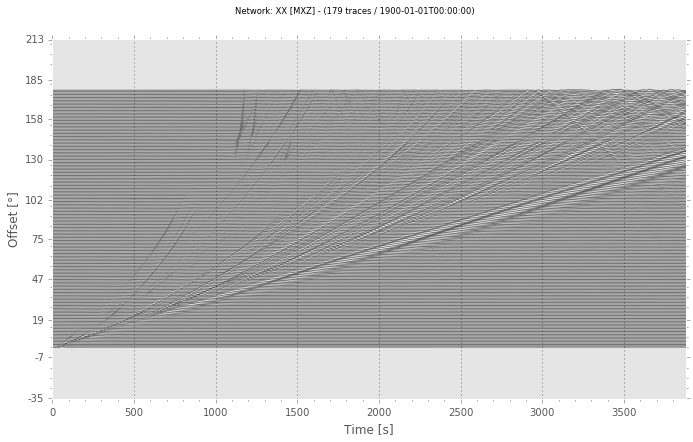

In [4]:
stZ = st.select(component='Z')
stZ.plot(equal_scale=False, type='section', dist_degree=True, ev_coord=(0,0), orientation='horizontal')

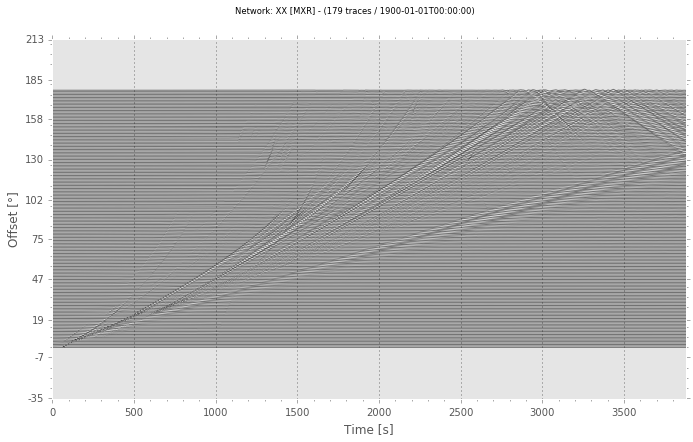

In [5]:
stR = st.select(component='R')
stR.plot(equal_scale=False, type='section', dist_degree=True, ev_coord=(0,0), orientation='horizontal')

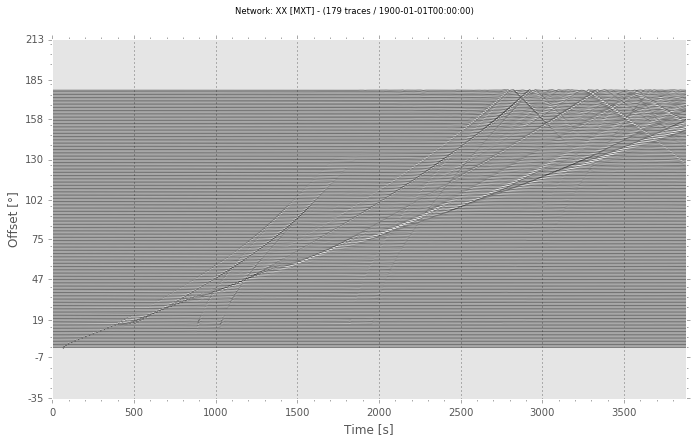

In [6]:
stT = st.select(component='T')
stT.plot(equal_scale=False, type='section', dist_degree=True, ev_coord=(0,0), orientation='horizontal')